# Noise Reduction

This Notebook is used to reduce the noise in the ECG signals.
First a Butterworth filter is applied to the signals to remove the high frequency noise.
Than a loess filter is applied to the signals to remove the low frequency noise.
Last Non local means filter is applied to the signals to remove the remaining noise.

In [1]:
from matplotlib import pyplot as plt
import wfdb.processing
import sys
import json

sys.path.append('../scripts')
import data_helper

## Load Data

For a better understanding of the structure and dimensions of the individual data sets, there are printed.

In [2]:
data = data_helper.load_data(only_demographic=False)

print("Number of patients per category:")
for cat_name in data.keys():
    print(f"{cat_name}: {len(data[cat_name])}")

Reading GSVT
Reading AFIB
Reading SR
Reading SB
Number of patients per category:
GSVT: 1027
AFIB: 9787
SR: 10426
SB: 15826


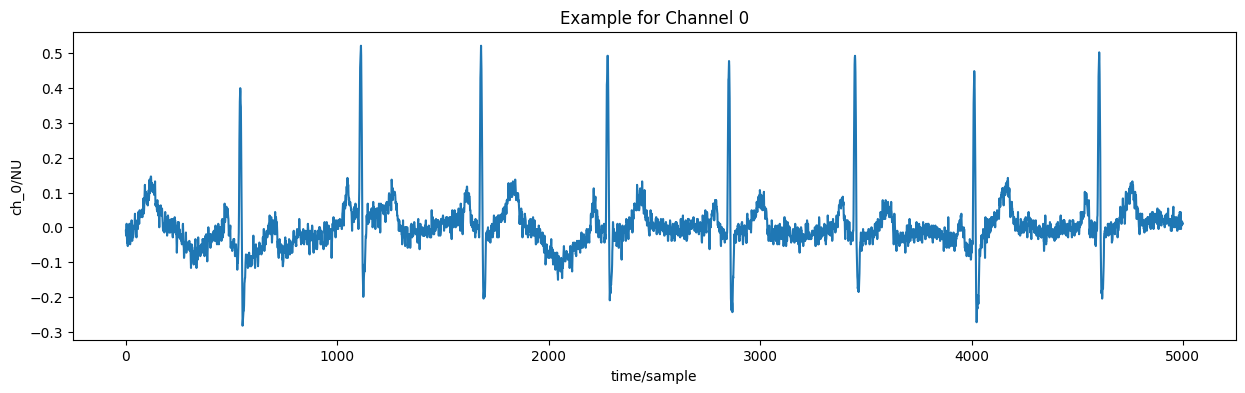

In [3]:
example_data = data['SB'][0]
#Plot specific Channel of Record
fig = wfdb.plot_items(example_data.p_signal[:,0],title="Example for Channel 0",figsize=(15,4),return_fig=True)

In [4]:
filter_params = {
    'names': ['butterlowpass', 'lowess', 'non_local_means'],
    # params for butterworth filter
    'order':1,
    'fs':500.0,
    'cutoff':25,
    # params for lowess filter
    'filter_strength':50,
    'template_window_size':7,
    'search_window_size':21,
    # params for nlm filter
    'frac':0.003,
    'it':1
}

#save filter params to json file
with open('../filter_params.json', 'w') as f:
    json.dump(filter_params, f)

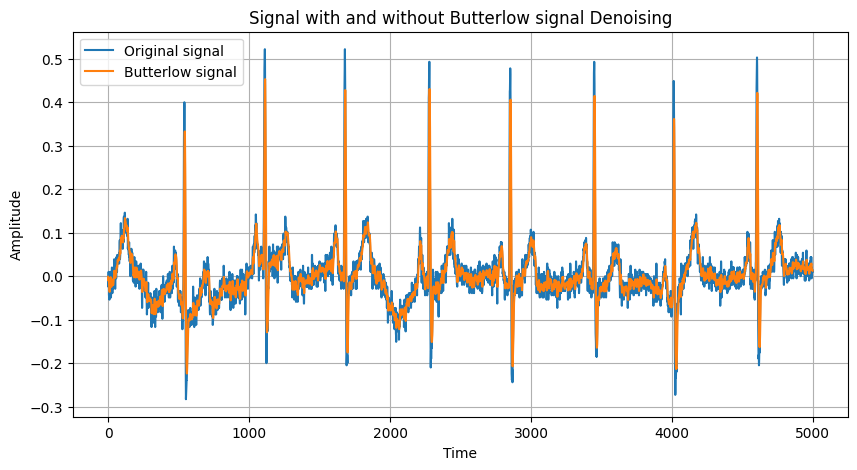

In [5]:
butter_filtered_sig = data_helper.butterlowpass_filter(example_data, filter_params['cutoff'], filter_params['fs'], filter_params['order'])
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(butter_filtered_sig.p_signal[:,0], label='Butterlow signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without Butterlow signal Denoising')
plt.legend()
plt.grid(True)
plt.show()

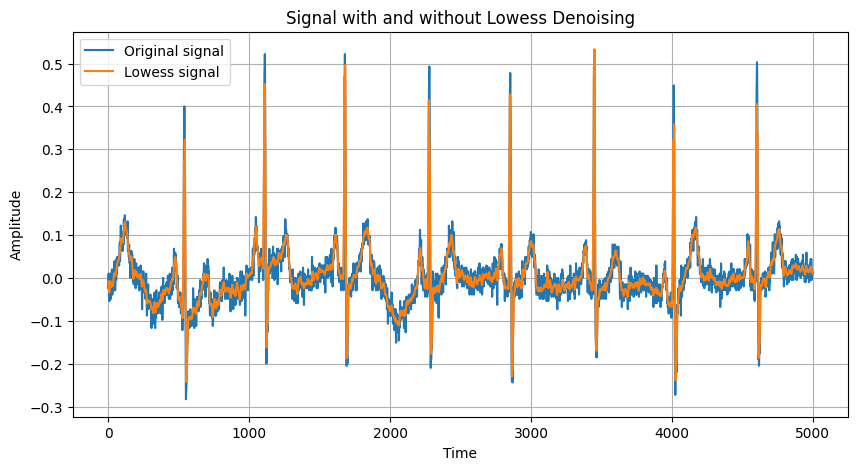

In [6]:
lowess_filtered_sig = data_helper.lowess_filter(example_data, filter_params['frac'], filter_params['it'])
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(lowess_filtered_sig.p_signal[:,0], label='Lowess signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without Lowess Denoising')
plt.legend()
plt.grid(True)
plt.show()

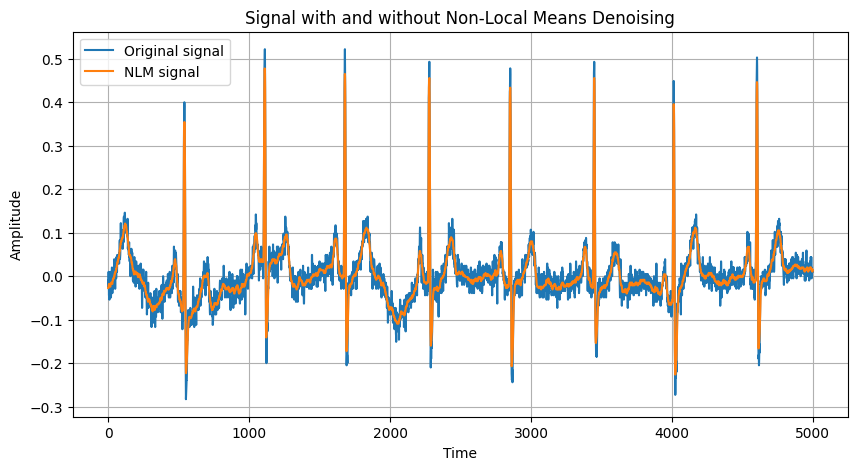

In [7]:
nlm_filtered_sig = data_helper.non_local_means_filter(example_data, filter_params['filter_strength'], filter_params['template_window_size'], filter_params['search_window_size'])
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(nlm_filtered_sig.p_signal[:,0], label='NLM signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without Non-Local Means Denoising')
plt.legend()
plt.grid(True)
plt.show()

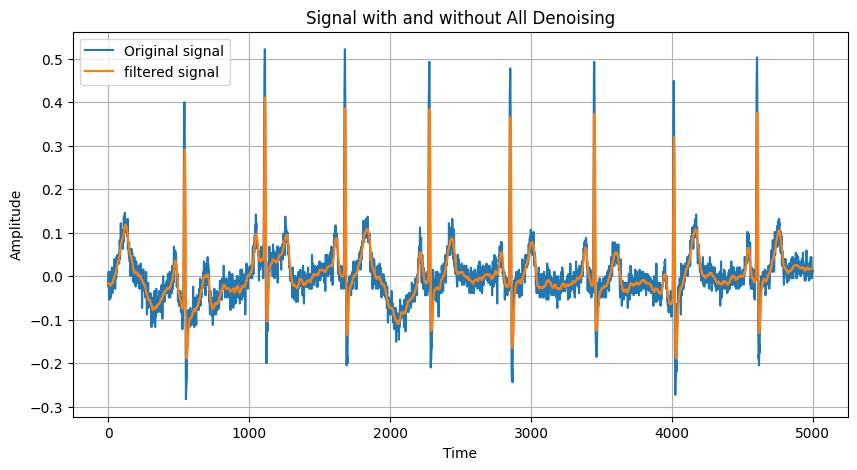

In [8]:
all_filtered_signals = data_helper.filter_data(example_data, filter_params)
# Plot the original and denoised signal
plt.figure(figsize=(10, 5))
plt.plot(example_data.p_signal[:,0], label='Original signal')
plt.plot(all_filtered_signals.p_signal[:,0], label='filtered signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with and without All Denoising')
plt.legend()
plt.grid(True)
plt.show()

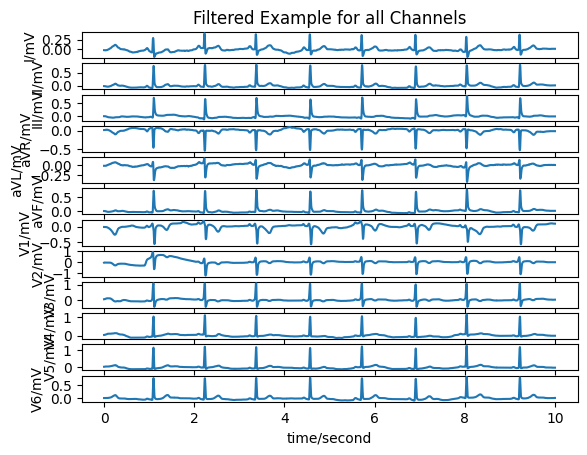

In [9]:
wfdb.plot_wfdb(all_filtered_signals,title="Filtered Example for all Channels")

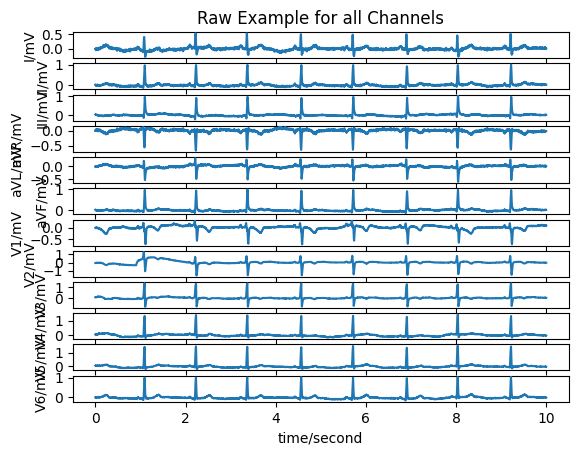

In [10]:
wfdb.plot_wfdb(example_data,title="Raw Example for all Channels")